# Classification des Algorithmes de Machine Learning 

## 1. Apprentissage Supervisé

### Classification

| Algorithme                  | Type             | Fonction / Objectif Théorique                                                                 | Indice / Mesure                     | Hyperparamètres Clés                                         |
|-----------------------------|----------------|-----------------------------------------------------------------------------------------------|-----------------------------------|--------------------------------------------------------------|
| **Régression Logistique**   | Linéaire       | Modéliser la probabilité qu'une instance appartienne à une classe                             | Sigmoïde, Cross-Entropy           | Taux d’apprentissage, Régularisation (L1/L2), Max itérations|
| **k-Nearest Neighbors (kNN)** | Instance-based | Classer selon la majorité des voisins proches                                                 | Distance (Euclidienne, Manhattan) | K voisins, Métrique distance, Poids (uniform/distance)       |
| **Support Vector Machine (SVM)** | Linéaire / Non-linéaire | Trouver l’hyperplan qui maximise la marge entre classes                                      | Hyperplan, Kernel Trick           | Type de kernel, C (regularization), Gamma (RBF kernel)       |
| **Decision Tree**           | Arbre           | Diviser récursivement les données selon les attributs pour maximiser l’homogénéité           | Entropy, Gini                     | Profondeur max, Min samples split, Critère (Gini/Entropy)    |
| **Random Forest**           | Ensemble        | Combiner plusieurs arbres pour réduire variance et sur-apprentissage                          | Votes majoritaires des arbres      | Nombre d’arbres, Profondeur max, Max features                |
| **Gradient Boosting (XGBoost, LightGBM)** | Ensemble        | Construire séquentiellement des modèles faibles pour corriger erreurs                         | Gradient des erreurs               | Learning rate, Nombre d’estimateurs, Profondeur max, Subsample|
| **Naive Bayes (Gaussian, Multinomial)** | Probabiliste    | Utiliser le théorème de Bayes pour calculer la probabilité d’appartenance à une classe       | Probabilités conditionnelles      | Type de distribution (gaussian, multinomial), Laplace smoothing |
| **Perceptron / MLP (Neural Networks)** | Réseau de neurones | Modéliser des relations complexes non linéaires entre caractéristiques et classes             | Sigmoïde, ReLU, Cross-Entropy     | Learning rate, Nombre de couches, Neurones par couche, Activation |




In [20]:
from sklearn.datasets import load_iris , load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------------------
# Chargement des données (binaire : Versicolor = 1, autres = 0)
# ---------------------------------------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target

print("Classes:", data.target_names)
print("Shape X:", X.shape)
print("Shape y:", y.shape)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardisation (nécessaire pour KNN & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Classes: ['malignant' 'benign']
Shape X: (569, 30)
Shape y: (569,)


In [21]:

# ---------------------------------------------------------------------
# 1) Régression Logistique
# ---------------------------------------------------------------------
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)


In [22]:

# ---------------------------------------------------------------------
# 2) KNN
# ---------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, pred_knn)


In [23]:

# ---------------------------------------------------------------------
# 3) SVM (linéaire)
# ---------------------------------------------------------------------
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, pred_svm)


In [24]:

# ---------------------------------------------------------------------
# 4) Arbre de Décision
# ---------------------------------------------------------------------
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

print("\n===================== MÉTRIQUES D'ÉVALUATION =====================")

def eval_model(name, y_true, y_pred):
    print(f"\n---- {name} ----")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_pred):.4f}")
    print(f"AUC       : {roc_auc_score(y_true, y_pred):.4f}")
   # print("\nClassification report :")
   # print(classification_report(y_true, y_pred, target_names=['Non-Versicolor', 'Versicolor']))

# Application des métriques sur les 4 modèles
eval_model("Régression Logistique", y_test, pred_lr)
eval_model("KNN", y_test, pred_knn)
eval_model("SVM", y_test, pred_svm)
eval_model("Arbre de Décision", y_test, pred_dt)



===================== MÉTRIQUES D'ÉVALUATION =====================

---- Régression Logistique ----
Accuracy  : 0.9649
Precision : 0.9636
Recall    : 0.9815
F1-score  : 0.9725
AUC       : 0.9590

---- KNN ----
Accuracy  : 0.9591
Precision : 0.9633
Recall    : 0.9722
F1-score  : 0.9677
AUC       : 0.9544

---- SVM ----
Accuracy  : 0.9766
Precision : 0.9815
Recall    : 0.9815
F1-score  : 0.9815
AUC       : 0.9749

---- Arbre de Décision ----
Accuracy  : 0.9649
Precision : 0.9636
Recall    : 0.9815
F1-score  : 0.9725
AUC       : 0.9590


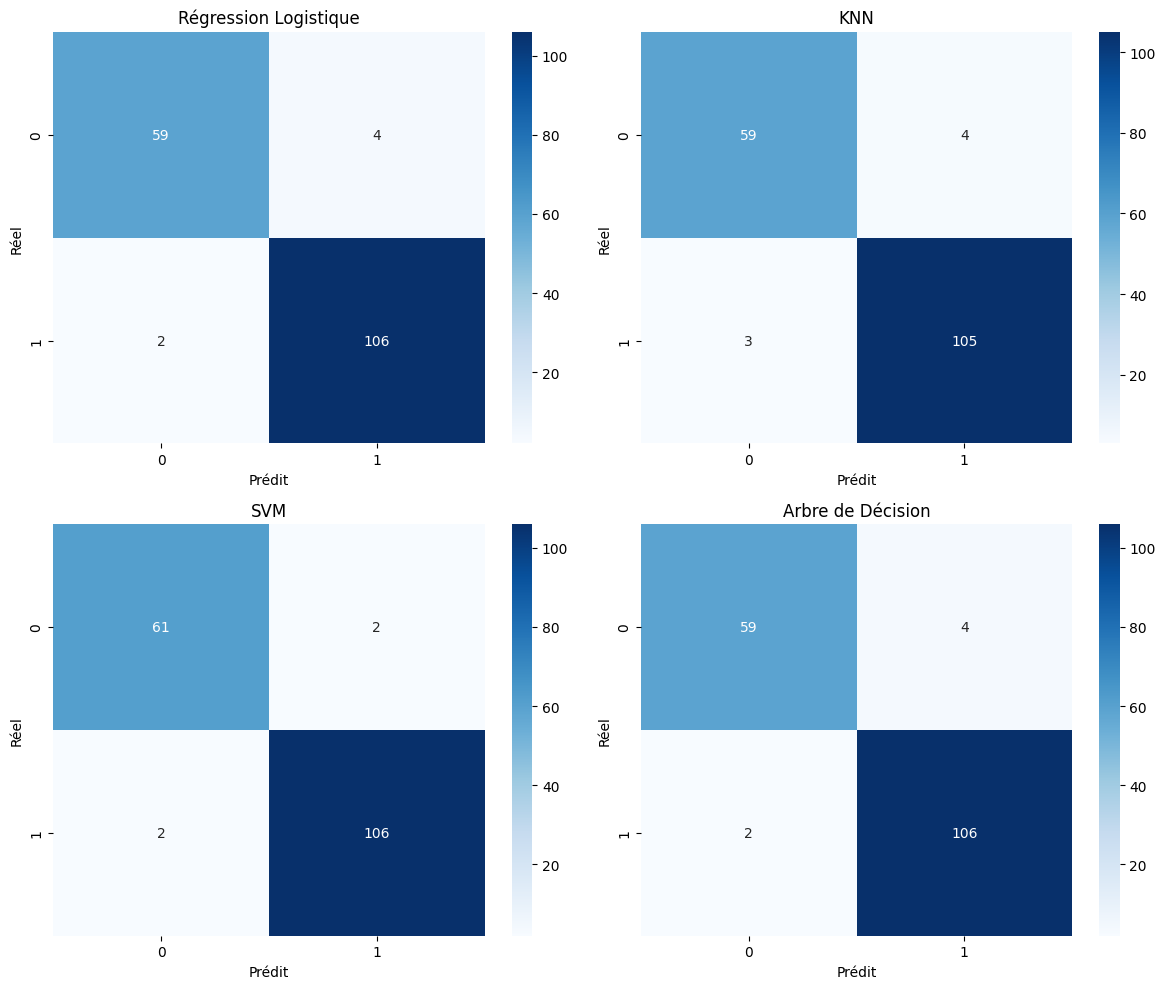

In [27]:
# ===========================================================
# . MATRICES DE CONFUSION
# ===========================================================
import matplotlib.pyplot as plt
import seaborn as sns
preds = {
    "Régression Logistique": pred_lr,
    "KNN": pred_knn,
    "SVM": pred_svm,
    "Arbre de Décision": pred_dt
}

plt.figure(figsize=(12, 10))

for i, (name, y_pred) in enumerate(preds.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Prédit")
    plt.ylabel("Réel")

plt.tight_layout()
plt.show()

![alt text](image-5.png)


https://www.youtube.com/watch?v=-ETQ97mXXF0&t=15513s

| Métrique             | Utilité                       |
| -------------------- | ----------------------------- |
| **Accuracy**         | Performance globale           |
| **Precision**        | Quand on veut éviter FP       |
| **Recall**           | Quand FN est grave            |
| **F1-Score**         | Bon compromis déséquilibré    |
| **Confusion Matrix** | Analyse détaillée des erreurs |
| **ROC-AUC**          | Comparaison de classifieurs   |


- 	Binaire : Precision, Recall, F1, AUC

- Multi-classes : Macro F1, Weighted F1, Micro F1 + Matrice NxN
	
- Accuracy = Surtout en cas de classes équilibrées



### Régression
| Algorithme | Description |
|------------|-------------|
| **Régression Linéaire** | Modélise la relation linéaire entre entrée et sortie |
| **Régression Polynomiale** | Modélise une relation non linéaire via un polynôme |

### Méthodes Ensemblistes
| Algorithme | Description |
|------------|-------------|
| **Random Forest** | Ensemble d’arbres indépendants (Bagging) |
| **Gradient Boosting (XGBoost, LightGBM)** | Arbres séquentiels corrigeant les erreurs (Boosting) |

---

| Algorithme                  | Type             | Fonction / Objectif Théorique                                                                 | Indice / Mesure / Critère          | Hyperparamètres Clés                                         |
|-----------------------------|----------------|-----------------------------------------------------------------------------------------------|----------------------------------|--------------------------------------------------------------|
| **Régression Linéaire**     | Linéaire       | Modéliser la relation linéaire entre les variables indépendantes et la variable dépendante   | Erreur quadratique moyenne (MSE), R² | Learning rate (si gradient descent), Regularization (L1/L2), Max iterations |
| **Régression Ridge / Lasso** | Linéaire régularisée | Minimiser l’erreur tout en pénalisant les coefficients pour éviter le sur-apprentissage      | MSE, R²                           | Alpha (force de régularisation), Learning rate, Max iterations |
| **k-Nearest Neighbors Regressor (kNN)** | Instance-based | Prédire la valeur d’une instance à partir de la moyenne des k voisins les plus proches        | Distance (Euclidienne, Manhattan), Erreur absolue moyenne | K voisins, Métrique distance, Poids (uniform/distance)       |
| **Support Vector Regression (SVR)** | Linéaire / Non-linéaire | Trouver un hyperplan qui prédit la valeur avec une tolérance epsilon                           | Epsilon-insensitive loss, R²      | Kernel type, C (regularization), Gamma (RBF kernel), Epsilon |
| **Decision Tree Regressor** | Arbre           | Diviser les données pour minimiser l’erreur de prédiction dans chaque feuille                 | MSE, Variance reduction           | Profondeur max, Min samples split, Min samples leaf         |
| **Random Forest Regressor** | Ensemble        | Combiner plusieurs arbres pour réduire la variance et améliorer la précision                  | MSE, Variance reduction           | Nombre d’arbres, Profondeur max, Max features              |
| **Gradient Boosting Regressor (XGBoost, LightGBM)** | Ensemble        | Séquentiellement corriger les erreurs des modèles faibles                                     | Gradient des erreurs, MSE          | Learning rate, Nombre d’estimateurs, Profondeur max, Subsample |
| **Neural Network Regressor (MLP)** | Réseau de neurones | Modéliser des relations complexes non linéaires entre caractéristiques et valeurs cibles      | MSE, Mean Absolute Error (MAE)   | Learning rate, Nombre de couches, Neurones par couche, Activation |





## 2. Apprentissage Non Supervisé

### Clustering (Regroupement)
| Algorithme | Description |
|------------|-------------|
| **K-Means** | Partitionne les données en k clusters |
| **Clustering Hiérarchique** | Produit un dendrogramme |
| **DBSCAN** | Détecte les clusters denses et les anomalies |

### Réduction de Dimensionnalité
| Algorithme | Description |
|------------|-------------|
| **PCA (ACP)** | Conserve la variance maximale dans un espace réduit |
| **t-SNE** | Visualisation en 2D/3D de données complexes |

---

## 3. Apprentissage par Renforcement

### Algorithmes de Base
| Algorithme | Description |
|------------|-------------|
| **Q-Learning** | Apprentissage d’une Q-fonction |
| **SARSA** | Variante du Q-Learning mais on utilise la politique suivie |

### Deep Reinforcement Learning
| Algorithme | Description |
|------------|-------------|
| **DQN** | Q-Learning + Réseaux de neurones |
| **Policy Gradient (A2C, PPO, etc.)** | Optimise directement la politique |

---

# (Transverse) Deep Learning

| Algorithme | Description |
|------------|-------------|
| **ANN** | Architecture de base |
| **CNN** | Spécialisé images |
| **RNN/LSTM/GRU** | Séries temporelles / texte |
| **Transformers** | État de l’art NLP / IA générative |

---

# Théorie
## 1. Régression Logistique

Bien que son nom contienne « régression », il s’agit d’un modèle de **classification binaire**.

### Fonction Sigmoïde

\[
h_\theta(x)=\frac{1}{1+e^{-z}} \quad \text{où} \quad z=\theta^T x
\]

- \( h_\theta(x) \in [0,1] \) : probabilité de classe 1  
- Décision :  
  - si \( h_\theta(x) > 0.5 \) → classe **1**  
  - sinon → classe **0**

---

## Exemple : Régression Logistique (Scikit-learn)
